In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly

In [2]:
data = pd.read_csv('Loan_Data.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
categorical = data.select_dtypes(include = ['object', 'category'])
numerical = data.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categorical.head())
print(f"\n\t\tNumerical Columns")
display(numerical.head())

		Categorical Columns


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y



		Numerical Columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [6]:
df.isnull().sum()       #--checking if there is any missing values. since there is,
                          #--have to clean the data, but first we need to categorise the data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# The DEPENDENTS column has a character that is not making python see it as a numerical column. We look for the character and remove it.
# df['Dependents'].sample(200).values
df['Dependents'] = df['Dependents'].str.replace('+', '')
df['Dependents'] = df['Dependents'].astype(float)
df['Dependents'].dtypes

dtype('float64')

In [8]:
# checking if the dependents column has been identified into its right datatype
# categorise first before cleaning the data


categorical = df.select_dtypes(exclude = 'number')
numerical = df.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categorical.head())

print(f"\n\t\tNumerical columns")
display(numerical.head())

		Categorical Columns


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y



		Numerical columns


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


In [9]:
# Select your strategy to handle missing values, and tell us why you had made that choice.
for i in df.columns: # ------------------------------------------------------- Iterate through the ds columns
    if ((df[i].isnull().sum()/ len(df)) * 100) > 30: # --------------------- If the missing value of a column is above 30%
        df.drop([i], axis = 1, inplace = True) # ----------------------------- Drop the column

    elif df[i].dtypes == 'O': # ---------------------------------------------- Or if its not above 30%, and its categorical
        df[i].fillna(df[i].mode()[0], inplace = True) # -------------------- fill the missing value with the mode

    else:
        df[i].fillna(df[i].median(), inplace = True) # --------------------- We are left with only numerical ds, fill the missing with median

df.isnull().sum()
# cleaning the df, because some columns has missing values

# we clean categorical with mode and
# median with numerical

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# PREPROCESSSING
# Standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

for i in numerical.columns: # ................................................. Select all numerical columns
    if i in df.columns: # ...................................................... If the selected column is found in the general dataframe
        df[i] = scaler.fit_transform(df[[i]]) # ................................ Scale it

for i in categorical.columns: # ............................................... Select all categorical columns
    if i in df.columns: # ...................................................... If the selected columns are found in the general dataframe
        df[i] = encoder.fit_transform(df[i])# .................................. encode it

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,-0.737806,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0.253470,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,2,1,1,-0.737806,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,3,1,1,-0.737806,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,4,1,0,-0.737806,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1


In [11]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [13]:
x = df.drop('Loan_Status', axis =1)
y = df.Loan_Status

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

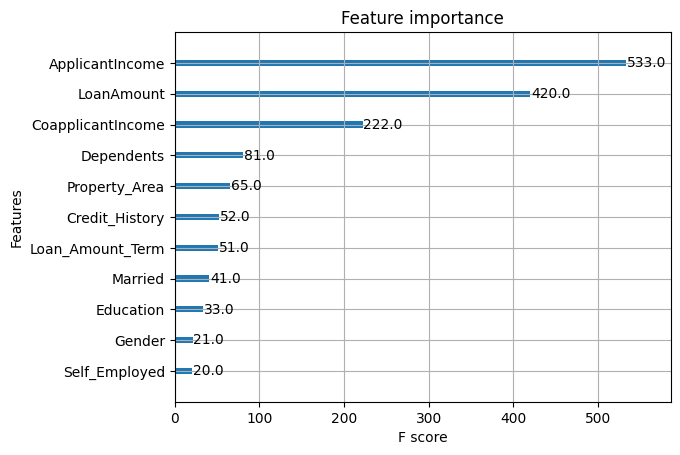

In [14]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [15]:
# Feature Selection
selected_columns = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
new_df = df[selected_columns]
new_df.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term
0,0.072991,-0.211241,-0.554487,-0.737806,2,0.411733,0.273231
1,-0.134412,-0.211241,-0.038732,0.253470,0,0.411733,0.273231
2,-0.393747,-0.948996,-0.554487,-0.737806,2,0.411733,0.273231
3,-0.462062,-0.306435,0.251980,-0.737806,2,0.411733,0.273231
4,0.097728,-0.056551,-0.554487,-0.737806,2,0.411733,0.273231


In [16]:
x = new_df
y = df.Loan_Status

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.10, random_state= 43, stratify = y)

              precision    recall  f1-score   support

           0       0.46      0.93      0.62        86
           1       0.98      0.80      0.88       466

    accuracy                           0.82       552
   macro avg       0.72      0.87      0.75       552
weighted avg       0.90      0.82      0.84       552



<Axes: >

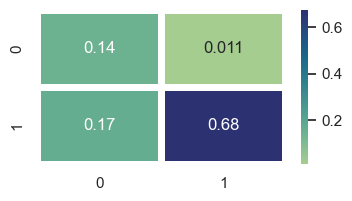

In [17]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression() # ............................................... Import the modelling Algorithm
log_reg.fit(xtrain, ytrain) # .................................................. Fit the algorithm on the data to get a model
cross_validation = log_reg.predict(xtrain) # ................................... Cross Validate the train to identify underfitting or overfitting
print(classification_report(cross_validation, ytrain)) # ....................... Use the classification report metric to get the model performance

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.21      0.80      0.33         5
           1       0.98      0.74      0.84        57

    accuracy                           0.74        62
   macro avg       0.59      0.77      0.59        62
weighted avg       0.91      0.74      0.80        62



<Axes: >

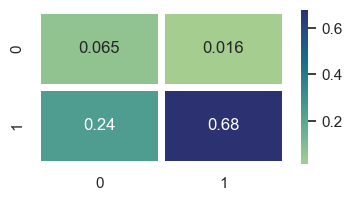

In [18]:
test_predict = log_reg.predict(xtest)
print(classification_report(test_predict, ytest))

revealer = confusion_matrix(test_predict, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)